In [466]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LogNorm

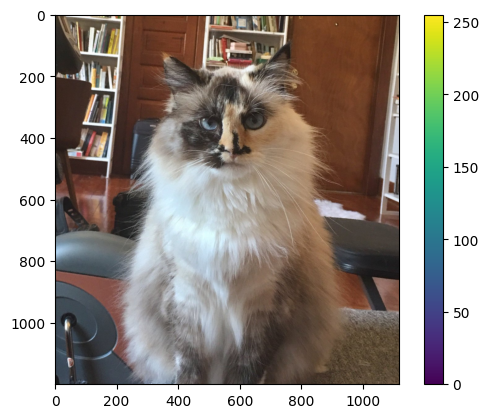

In [467]:
ruta_imagen = "gato Miette.jpg"
img = np.array(Image.open(ruta_imagen))
p = plt.imshow(img)
plt.colorbar(p)

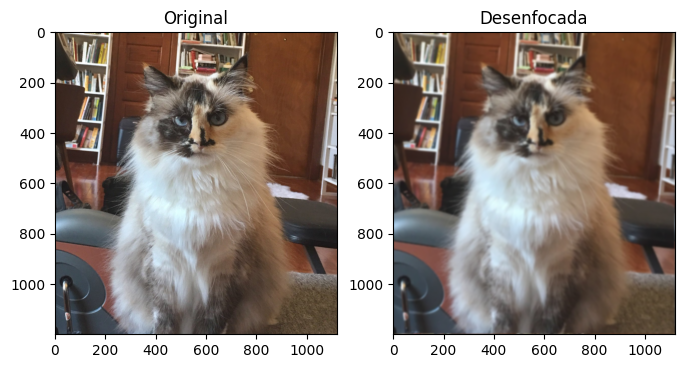

In [468]:
h, w, c = img.shape
X, Y = np.meshgrid(np.linspace(-1, 1, w), np.linspace(-1, 1, h))
sigma = 0.1  # controla qué tanto desenfoque hay
gauss = np.exp(-(X**2 + Y**2) / (2 * sigma**2))

img_fin = np.zeros_like(img)

for ch in range(3):
    F = np.fft.fft2(img[:, :, ch])
    F = np.fft.fftshift(F)
    
    F_fil = F * gauss
    
    F_ishift = np.fft.ifftshift(F_fil)
    desenfo = np.fft.ifft2(F_ishift).real
    
    desenfo = np.clip(desenfo, 0, 255)
    img_fin[:, :, ch] = desenfo.astype(np.uint8)

Image.fromarray(img_fin).save("3.a.jpg")

#Creo que esto toca borrarlo 
plt.figure(figsize=(8,5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Desenfocada")
plt.imshow(img_fin)


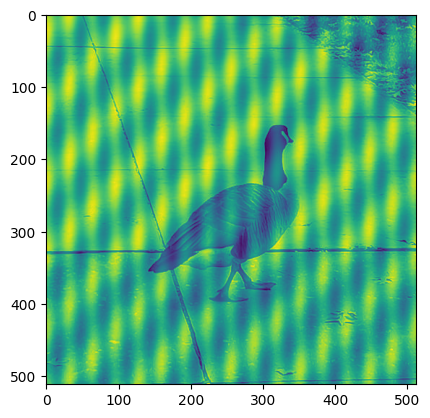

In [469]:
ruta_img2="p_a_t_o.jpg"
img2=np.array(Image.open(ruta_img2))
plt.imshow(img2)

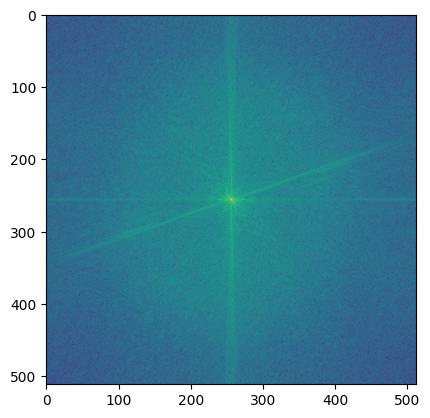

In [470]:
F = np.fft.fft2(img2)
F = np.fft.fftshift(F)

h, w = F.shape
X2, Y2 = np.meshgrid(np.arange(-w//2, w//2), np.arange(-h//2, h//2))
Z = np.hypot(X2, Y2) <= 20

plt.imshow(abs(F),norm="log")
#plt.imshow(Z,alpha=0.2,cmap="gray")

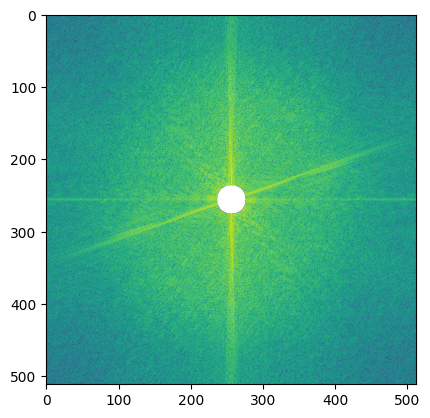

In [471]:
F_filtered = F * (1 - Z)
plt.imshow(abs(F_filtered), norm="log")

In [472]:
"""img_filtrada = np.fft.ifft2(np.fft.fftshift(F_filtered))
plt.imshow(img_filtrada.real)"""

'img_filtrada = np.fft.ifft2(np.fft.fftshift(F_filtered))\nplt.imshow(img_filtrada.real)'

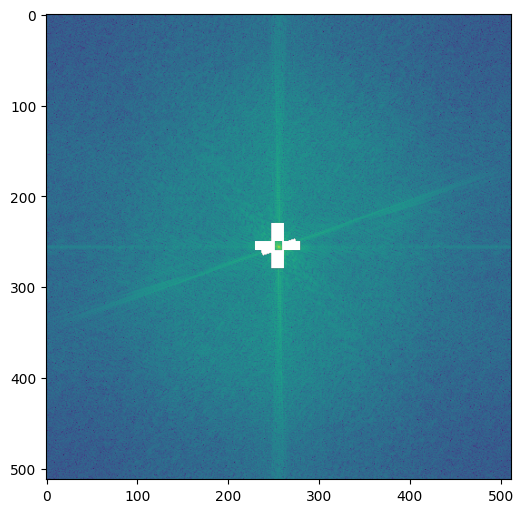

In [473]:
F_filtered = F.copy()
F_filtered[230:250, 248:262] = 0.
F_filtered[260:280, 248:262] = 0.

F_filtered[250:260,230:252] = 0.
F_filtered[250:260,260:280] = 0.

#F_filtered[349:361,0:240] = 0.

X2, Y2 = np.meshgrid(np.arange(-w//2, w//2), np.arange(-h//2, h//2))
Z = 0
dpx = 0
#Z = np.hypot(X2, Y2) > 20


while dpx <= 10:
    #Z = ((-X2 == 3*Y2 + 10) | (-X2 == 3*Y2 - 10)) & (np.hypot(X2, Y2) > 20)

    Z |= ((-X2 == 3*Y2 + dpx) | (-X2 == 3*Y2 - dpx))
    dpx += 1

Z &= (np.hypot(X2, Y2) > 5) & (np.hypot(X2, Y2) < 20)


F_filtered = F_filtered * (1 - Z)
plt.figure(figsize=(6,7))
plt.imshow(abs(F_filtered),norm="log")

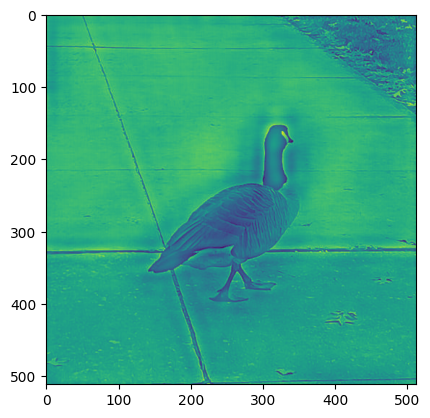

In [474]:
img_filtrada = np.fft.ifft2(np.fft.fftshift(F_filtered))
plt.imshow(img_filtrada.real)

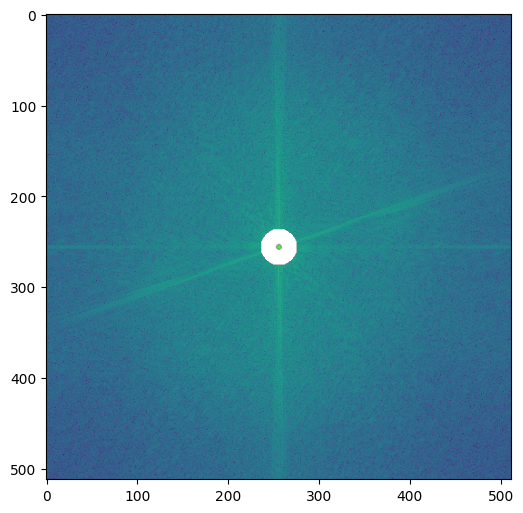

In [475]:
Z = (np.hypot(X2, Y2) > 3) & (np.hypot(X2, Y2) < 20)


F_filtered = F * (1 - Z)
plt.figure(figsize=(6,7))
plt.imshow(abs(F_filtered),norm="log")

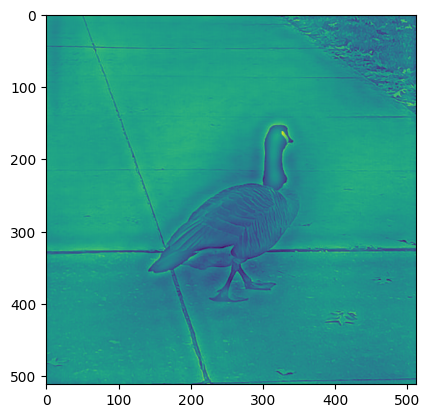

In [476]:
img_filtrada = np.fft.ifft2(np.fft.fftshift(F_filtered))
plt.imshow(img_filtrada.real)

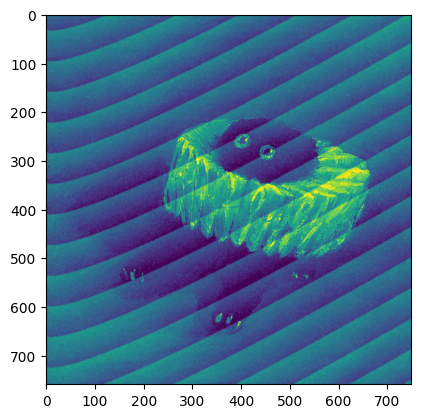

In [477]:
ruta_img3="g_a_t_o.png"
img3=np.array(Image.open(ruta_img3))
plt.imshow(img3)

(759, 750)


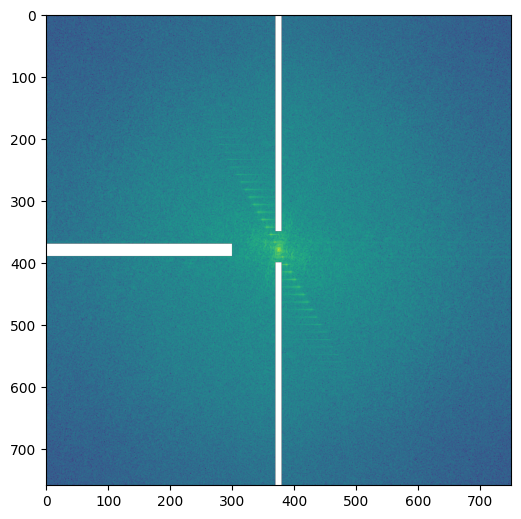

In [478]:
F2 = np.fft.fft2(img3)
F2 = np.fft.fftshift(F2)

h2, w2 = F2.shape
print(F2.shape)
X3, Y3 = np.meshgrid(np.arange(-w2//2, w2//2), np.arange(-h2//2, h2//2))
Z2 = (np.hypot(X3, Y3) > 15) & (np.hypot(X3, Y3) < 25)

F2_filtered = F2.copy()
F2_filtered[0:350, 370:380] = 0.
F2_filtered[400:759, 370:380] = 0.

F2_filtered[370:390,0:300] = 0.
F2_filtered[370:390,260:280] = 0.





plt.figure(figsize=(6,7))
plt.imshow(abs(F2_filtered), norm="log")

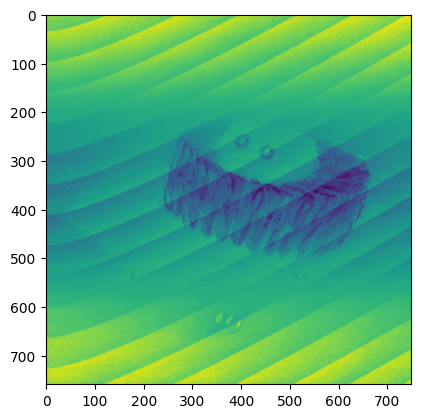

In [479]:
img2_filtrada = np.fft.ifft2(np.fft.fftshift(F2_filtered))
plt.imshow(img2_filtrada.real)